In [1]:
# libraries
import numpy as np
import pandas as pd
import seaborn as sns
import zipfile
import re
import warnings
warnings.filterwarnings('ignore')
import string
import os
import random

In [2]:
#getting files
'''with zipfile.ZipFile(f'Downloads/kaggle-survey-2019.zip', 'r') as zip_ref:
    zip_ref.extractall('data_unzippped_2019/')
with zipfile.ZipFile(f'Downloads/kaggle-survey-2020.zip', 'r') as zip_ref:
    zip_ref.extractall('data_unzippped_2020/')
with zipfile.ZipFile(f'Downloads/kaggle-survey-2021.zip', 'r') as zip_ref:
    zip_ref.extractall('data_unzippped_2021/')'''
    
survey_schema_2019 = pd.read_csv("data_unzippped_2019/survey_schema.csv")
multiple_choice_responses_2019 = pd.read_csv("data_unzippped_2019/multiple_choice_responses.csv")
freeform_responses_2019 = pd.read_csv("data_unzippped_2019/other_text_responses.csv")

df_2020 = pd.read_csv('data_unzippped_2020/kaggle_survey_2020_responses.csv',low_memory=False)
df_2021 = pd.read_csv('data_unzippped_2021/kaggle_survey_2021_responses.csv',low_memory=False)

In [3]:
#first we want to combine the data for 2020-2021

#stating all the columns form list_2020 should be replaced with the stated columns from list_2021
list_2020 = ['Q9_Part_11', 'Q10_Part_13', 'Q12_Part_3', 'Q16_Part_15', 'Q20', 'Q21', 'Q22', 'Q23_Part_1', 
            'Q23_Part_2', 'Q23_Part_3', 'Q23_Part_4', 'Q23_Part_5', 'Q23_Part_6', 'Q23_Part_7', 'Q23_OTHER',
            'Q24', 'Q25', 'Q26_A_Part_1', 'Q26_A_Part_2', 'Q26_A_Part_3', 'Q26_A_Part_4', 'Q26_A_Part_5', 
            'Q26_A_Part_6', 'Q26_A_Part_7', 'Q26_A_Part_8', 'Q26_A_Part_9', 'Q26_A_Part_10', 'Q26_A_Part_11',
            'Q26_A_OTHER', 'Q27_A_Part_1', 'Q27_A_Part_7', 'Q27_A_Part_11', 'Q27_A_OTHER', 'Q28_A_Part_1',
            'Q28_A_Part_4', 'Q28_A_Part_10', 'Q28_A_OTHER', 'Q29_A_Part_1', 'Q29_A_Part_2', 'Q29_A_Part_3',
            'Q29_A_Part_4', 'Q29_A_Part_5', 'Q29_A_Part_6', 'Q29_A_Part_7', 'Q29_A_Part_8', 'Q29_A_Part_11',
            'Q29_A_Part_13', 'Q29_A_Part_14', 'Q29_A_Part_15', 'Q29_A_Part_16', 'Q29_A_Part_17', 'Q29_A_OTHER',
            'Q30', 'Q31_A_Part_1', 'Q31_A_Part_2', 'Q31_A_Part_3', 'Q31_A_Part_4', 'Q31_A_Part_5', 'Q31_A_Part_6',
            'Q31_A_Part_7', 'Q31_A_Part_8', 'Q31_A_Part_9', 'Q31_A_Part_10', 'Q31_A_Part_11', 'Q31_A_Part_12',
            'Q31_A_Part_13', 'Q31_A_Part_14', 'Q31_A_OTHER', 'Q32', 'Q33_A_Part_1', 'Q33_A_Part_2', 'Q33_A_Part_3',
            'Q33_A_Part_4', 'Q33_A_Part_5', 'Q33_A_Part_6', 'Q33_A_Part_7', 'Q33_A_OTHER', 'Q34_A_Part_1', 'Q34_A_Part_2',
            'Q34_A_Part_3', 'Q34_A_Part_4', 'Q34_A_Part_11', 'Q34_A_OTHER', 'Q35_A_Part_1', 'Q35_A_Part_2', 'Q35_A_Part_3',
            'Q35_A_Part_4', 'Q35_A_Part_5', 'Q35_A_Part_6', 'Q35_A_Part_7', 'Q35_A_Part_8', 'Q35_A_Part_9', 'Q35_A_Part_10',
            'Q35_A_OTHER', 'Q36_Part_1', 'Q36_Part_2', 'Q36_Part_3', 'Q36_Part_4', 'Q36_Part_5', 'Q36_Part_6', 'Q36_Part_7',
            'Q36_Part_8', 'Q36_Part_9', 'Q36_OTHER', 'Q37_Part_1', 'Q37_Part_2', 'Q37_Part_3', 'Q37_Part_4', 'Q37_Part_5',
            'Q37_Part_6', 'Q37_Part_7', 'Q37_Part_8', 'Q37_Part_9', 'Q37_Part_10', 'Q37_Part_11', 'Q37_OTHER', 'Q38',
            'Q39_Part_1', 'Q39_Part_2', 'Q39_Part_3', 'Q39_Part_4', 'Q39_Part_5', 'Q39_Part_6', 'Q39_Part_7', 'Q39_Part_8',
            'Q39_Part_9', 'Q39_Part_10', 'Q39_Part_11', 'Q39_OTHER']


list_2021 = ['Q9_Part_12', 'Q10_Part_16', 'Q12_Part_5', 'Q16_Part_17', 'Q21', 'Q22', 'Q23', 'Q24_Part_1', 'Q24_Part_2', 'Q24_Part_3',
             'Q24_Part_4', 'Q24_Part_5', 'Q24_Part_6', 'Q24_Part_7', 'Q24_OTHER', 'Q25', 'Q26', 'Q27_A_Part_1', 'Q27_A_Part_2',
             'Q27_A_Part_3', 'Q27_A_Part_4', 'Q27_A_Part_5', 'Q27_A_Part_6', 'Q27_A_Part_7', 'Q27_A_Part_8', 'Q27_A_Part_9',
             'Q27_A_Part_10', 'Q27_A_Part_11', 'Q27_A_OTHER', 'Q29_A_Part_1', 'Q29_A_Part_3', 'Q29_A_Part_4', 'Q29_A_OTHER',
             'Q31_A_Part_1', 'Q31_A_Part_2', 'Q31_A_Part_9', 'Q31_A_OTHER', 'Q32_A_Part_1', 'Q32_A_Part_2', 'Q32_A_Part_3', 'Q32_A_Part_4',
             'Q32_A_Part_5', 'Q32_A_Part_6', 'Q32_A_Part_7', 'Q32_A_Part_8', 'Q32_A_Part_11', 'Q32_A_Part_14', 'Q32_A_Part_15',
             'Q32_A_Part_16', 'Q32_A_Part_17', 'Q32_A_Part_20', 'Q32_A_OTHER', 'Q33', 'Q34_A_Part_1', 'Q34_A_Part_2', 'Q34_A_Part_3',
             'Q34_A_Part_4', 'Q34_A_Part_5', 'Q34_A_Part_6', 'Q34_A_Part_7', 'Q34_A_Part_8', 'Q34_A_Part_9', 'Q34_A_Part_10',
             'Q34_A_Part_11', 'Q34_A_Part_12', 'Q34_A_Part_13', 'Q34_A_Part_16', 'Q34_A_OTHER', 'Q35', 'Q36_A_Part_1', 'Q36_A_Part_2',
             'Q36_A_Part_3', 'Q36_A_Part_4', 'Q36_A_Part_5', 'Q36_A_Part_6', 'Q36_A_Part_7', 'Q36_A_OTHER', 'Q37_A_Part_1', 'Q37_A_Part_2',
             'Q37_A_Part_3', 'Q37_A_Part_4', 'Q37_A_Part_7', 'Q37_A_OTHER', 'Q38_A_Part_1', 'Q38_A_Part_2', 'Q38_A_Part_3', 'Q38_A_Part_4',
             'Q38_A_Part_5', 'Q38_A_Part_6', 'Q38_A_Part_7', 'Q38_A_Part_8', 'Q38_A_Part_9', 'Q38_A_Part_11', 'Q38_A_OTHER', 'Q39_Part_1',
             'Q39_Part_2', 'Q39_Part_3', 'Q39_Part_4', 'Q39_Part_5', 'Q39_Part_6', 'Q39_Part_7', 'Q39_Part_8', 'Q39_Part_9', 'Q39_OTHER',
             'Q40_Part_1', 'Q40_Part_2', 'Q40_Part_3', 'Q40_Part_4', 'Q40_Part_5', 'Q40_Part_6', 'Q40_Part_7', 'Q40_Part_8', 'Q40_Part_9',
             'Q40_Part_10', 'Q40_Part_11', 'Q40_OTHER', 'Q41', 'Q42_Part_1', 'Q42_Part_2', 'Q42_Part_3','Q42_Part_4', 'Q42_Part_5',
             'Q42_Part_6', 'Q42_Part_7', 'Q42_Part_8', 'Q42_Part_9', 'Q42_Part_10', 'Q42_Part_11', 'Q42_OTHER']

#all empty columns we want to add for 2020
Nan_2020 = ['Q10_Part_13','Q10_Part_14','Q10_Part_15','Q12_Part_3','Q12_Part_4','Q16_Part_15',
            'Q16_Part_16','Q20','Q28','Q29_A_Part_2','Q30_A_OTHER','Q30_A_Part_1','Q30_A_Part_2',
            'Q30_A_Part_3','Q30_A_Part_4','Q30_A_Part_5','Q30_A_Part_6','Q30_A_Part_7','Q31_A_Part_3',
            'Q31_A_Part_4','Q31_A_Part_5','Q31_A_Part_6','Q31_A_Part_7','Q31_A_Part_8','Q32_A_Part_10',
            'Q32_A_Part_12','Q32_A_Part_13','Q32_A_Part_18','Q32_A_Part_19','Q32_A_Part_9','Q34_A_Part_14',
            'Q34_A_Part_15','Q37_A_Part_5','Q37_A_Part_6','Q38_A_Part_10','Q9_Part_11']


#writing all the columns that we want to drop from 2020 and 2021 based on the above
drop_2020 = list(df_2020)
for i in list_2020:
    drop_2020.remove(i)
print(drop_2020[103:])
drop_2020 = drop_2020[103:]
drop_2021 = list(df_2021)
drop_2021 = drop_2021[268:]

['Q27_A_Part_2', 'Q27_A_Part_3', 'Q27_A_Part_4', 'Q27_A_Part_5', 'Q27_A_Part_6', 'Q27_A_Part_8', 'Q27_A_Part_9', 'Q27_A_Part_10', 'Q28_A_Part_2', 'Q28_A_Part_3', 'Q28_A_Part_5', 'Q28_A_Part_6', 'Q28_A_Part_7', 'Q28_A_Part_8', 'Q28_A_Part_9', 'Q29_A_Part_9', 'Q29_A_Part_10', 'Q29_A_Part_12', 'Q34_A_Part_5', 'Q34_A_Part_6', 'Q34_A_Part_7', 'Q34_A_Part_8', 'Q34_A_Part_9', 'Q34_A_Part_10', 'Q26_B_Part_1', 'Q26_B_Part_2', 'Q26_B_Part_3', 'Q26_B_Part_4', 'Q26_B_Part_5', 'Q26_B_Part_6', 'Q26_B_Part_7', 'Q26_B_Part_8', 'Q26_B_Part_9', 'Q26_B_Part_10', 'Q26_B_Part_11', 'Q26_B_OTHER', 'Q27_B_Part_1', 'Q27_B_Part_2', 'Q27_B_Part_3', 'Q27_B_Part_4', 'Q27_B_Part_5', 'Q27_B_Part_6', 'Q27_B_Part_7', 'Q27_B_Part_8', 'Q27_B_Part_9', 'Q27_B_Part_10', 'Q27_B_Part_11', 'Q27_B_OTHER', 'Q28_B_Part_1', 'Q28_B_Part_2', 'Q28_B_Part_3', 'Q28_B_Part_4', 'Q28_B_Part_5', 'Q28_B_Part_6', 'Q28_B_Part_7', 'Q28_B_Part_8', 'Q28_B_Part_9', 'Q28_B_Part_10', 'Q28_B_OTHER', 'Q29_B_Part_1', 'Q29_B_Part_2', 'Q29_B_Part_3', '

In [ ]:
#drop columns from 2020 and 2021
new_df_2020 = df_2020.drop(drop_2020, axis = 1)
new_df_2021 = df_2021.drop(drop_2021, axis = 1)
#rename columns of 2020 based on 2021
print(list_2020.index('Q22'))
for i in range(0,4):
    print(list_2020[i])
    new_df_2020.rename(columns={list_2020[i]: list_2021[i]}, inplace=True)
new_df_2020.rename(columns={'Q22':'Q23','Q21':'Q22','Q20': 'Q21'},inplace=True)
for i in range(7,15):
    new_df_2020.rename(columns={list_2020[i]: list_2021[i]}, inplace=True)
new_df_2020.rename(columns={'Q25':'Q26','Q24':'Q25'}, inplace=True)
for i in range(17,len(list_2021)):
    new_df_2020.rename(columns={list_2020[i]: list_2021[i]}, inplace=True)


print(list_2020)
#add the empty columns for 2020
new_df_2020[Nan_2020] = np.NAN
print(new_df_2020.columns.tolist())
#remove accidental duplicate columns from 2020

#ew_df_2020.columns = list(new_df_2021)

mylist = list(new_df_2020)
print(mylist)
newlist = [] 
duplist = [] 
for i in mylist:
    if i not in newlist:
        newlist.append(i)
    else:
        duplist.append(i) 
print(duplist)
new_df_2020=new_df_2020.drop(duplist, axis = 1)

#drop questions line for 2020
new_df_2020 = new_df_2020.drop(0)

#add years for 2020/2021
new_df_2020['Year'] = 2020

new_df_2021['Year'] = 2021


#concat 2021/2020 and write to csv file
full_df = pd.concat([new_df_2021,new_df_2020])

full_df.to_csv('Kaggle_survey 2020-2021.csv', index = False)

In [ ]:
#merge parts together to match 2019 format
full_df["Q9_Part_1"][1:] = full_df["Q9_Part_1"][1:] + full_df["Q9_Part_11"][1:]
full_df["Q9_Part_3"][1:] = full_df["Q9_Part_3"][1:] + full_df["Q9_Part_4"][1:]
full_df["Q10_Part_10"][1:] = full_df["Q10_Part_10"][1:] + full_df["Q10_Part_11"][1:]

#rearrange 2020-2021 so it drops all not in common with 2019
full_df = full_df.drop("Q10_Part_11", axis = 1)
full_df = full_df.drop("Q9_Part_11", axis = 1)
full_df = full_df.drop("Q9_Part_4", axis = 1)
full_df = full_df.drop("Q33", axis = 1)
columns = list(full_df)
drop = ['Q11', 'Q20'] + columns[144:152] + columns[183:201] + columns[217:239]
print(drop)
full_df = full_df.drop(drop, axis = 1)
print(full_df.columns[150:])
full_df = full_df.drop("Q28", axis = 1)


#rearranging 2019 columns to fit above file
overall = ['Time from Start to Finish (seconds)','Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q15', 'Q18_Part_1', 'Q18_Part_2', 'Q18_Part_3', 'Q18_Part_4', 'Q18_Part_5',
           'Q18_Part_6', 'Q18_Part_7', '', '', 'Q18_Part_9', 'Q18_Part_10', 'Q18_Part_11', 'Q18_Part_12', 'Q19', 'Q16_Part_1',
           'Q16_Part_2', 'Q16_Part_6', 'Q16_Part_3', 'Q16_Part_7', 'Q16_Part_9', 'Q16_Part_10', 'Q16_Part_8', 'Q16_Part_5',
           'Q16_Part_11', 'Q16_Part_12', 'Q17_Part_1', 'Q17_Part_2', 'Q17_Part_3', 'Q17_Part_5', 'Q17_Part_7', 'Q17_Part_9',
           'Q17_Part_8', '', '', 'Q17_Part_4', '', '', '', '', '', 'Q17_Part_12', 'Q21_Part_2', 'Q21_Part_3', '', '',
           'Q21_Part_4', 'Q21_Part_5', 'Q22', 'Q20_Part_2', 'Q20_Part_8', 'Q20_Part_6', 'Q20_Part_1', 'Q20_Part_4',
           'Q20_Part_5', 'Q20_Part_3', 'Q20_Part_7', 'Q20_Part_9', 'Q20_Part_10', 'Q20_Part_11', 'Q20_Part_12', 'Q23',
           'Q28_Part_1', 'Q28_Part_2', 'Q28_Part_3', 'Q28_Part_6', 'Q28_Part_10', ' ', 'Q28_Part_5', 'Q28_Part_8', '', '', '',
           'Q28_Part_7', '', '', '', '', 'Q28_Part_11', 'Q28_Part_12', 'Q24_Part_1', 'Q24_Part_2', 'Q24_Part_3', 'Q24_Part_4',
           'Q24_Part_5', 'Q24_Part_6', 'Q24_Part_7', 'Q24_Part_8', 'Q24_Part_9', 'Q24_Part_10', 'Q24_Part_11', 'Q24_Part_12',
           'Q26_Part_1', 'Q26_Part_2', 'Q26_Part_3', 'Q26_Part_4', 'Q26_Part_5', 'Q26_Part_6', 'Q26_Part_7', 'Q27_Part_1', 
           'Q27_Part_2', 'Q27_Part_3', 'Q27_Part_4', 'Q27_Part_5', 'Q27_Part_6', 'Q6', 'Q7', 'Q8', 'Q9_Part_1', 'Q9_Part_2',
           'Q9_Part_3', 'Q9_Part_4', 'Q9_Part_5', 'Q9_Part_6', 'Q9_Part_7', 'Q9_Part_8', 'Q10', 'Q11', 'Q29_Part_2',
           'Q29_Part_3', 'Q29_Part_1', 'Q29_Part_4', 'Q29_Part_10', 'Q29_Part_7', 'Q29_Part_8', 'Q29_Part_6', 'Q29_Part_9',
           'Q29_Part_5', '', 'Q29_Part_11', 'Q29_Part_12', 'Q30_Part_1', 'Q30_Part_4', 'Q30_Part_6', 'Q30_Part_11',
           'Q30_Part_12', 'Q32_Part_10', 'Q32_Part_3', '', '', '', '', '', 'Q32_Part_8', 'Q32_Part_11', 'Q32_Part_12',
           'Q34_Part_1', 'Q34_Part_2', 'Q34_Part_3', 'Q34_Part_5', '', '', '', 'Q34_Part_4', 'Q34_Part_9', '', 'Q31_Part_2', '',
           'Q34_Part_7', 'Q34_Part_8', 'Q31_Part_1', 'Q34_Part_10', '', '', '', 'Q31_Part_11', 'Q31_Part_12', 'Q25_Part_1',
           'Q25_Part_2', 'Q25_Part_3', 'Q25_Part_4', 'Q25_Part_5', 'Q25_Part_6', 'Q25_Part_7', 'Q25_Part_8', 'Q33_Part_1',
           'Q33_Part_2', 'Q33_Part_3', 'Q33_Part_4', '', '', 'Q33_Part_11', 'Q33_Part_12', 'Q13_Part_2', 'Q13_Part_3',
           'Q13_Part_6', 'Q13_Part_4', 'Q13_Part_7', 'Q13_Part_1', 'Q13_Part_8', 'Q13_Part_9', '', 'Q13_Part_10', 'Q13_Part_11',
           'Q13_Part_12', 'Q14', 'Q12_Part_1', 'Q12_Part_2', 'Q12_Part_3', 'Q12_Part_4','Q12_Part_5', 'Q12_Part_6', 'Q12_Part_7',
           'Q12_Part_8', 'Q12_Part_9', 'Q12_Part_10', 'Q12_Part_11', 'Q12_Part_12']
Nan_2019 = ['Q7_Part_8', 'Q7_Part_9', 'Q10_Part_8', 'Q10_Part_9', 'Q10_Part_12', 'Q10_Part_13', 'Q10_Part_14', 'Q10_Part_15',
            'Q10_Part_16', 'Q12_Part_3', 'Q12_Part_4', 'Q16_Part_6', 'Q16_Part_9', 'Q16_Part_10', 'Q16_Part_11', 'Q16_Part_13',
            'Q16_Part_14', 'Q16_Part_15', 'Q16_Part_16', 'Q27_A_Part_10', 'Q31_A_Part_3', 'Q31_A_Part_4', 'Q31_A_Part_5',
            'Q31_A_Part_6', 'Q31_A_Part_7', 'Q32_A_Part_5', 'Q32_A_Part_6', 'Q32_A_Part_7', 'Q32_A_Part_10', 'Q32_A_Part_12',
            'Q32_A_Part_17', 'Q32_A_Part_18', 'Q32_A_Part_19', 'Q37_A_Part_5', 'Q37_A_Part_6', 'Q40_Part_9']

In [ ]:
#removing all columns not mentioned above
def check(column):
    Qs = full_df[column].tolist()
    array = []
    for i in Qs:
        if i not in array:
            array.append(i)
    return array

#do the same for 2019 as 2020/2021 where you have a reordered list for 2019 and drop not needed columns based on the list
drop_2019 = list(multiple_choice_responses_2019)
for i in overall:
    if i != '' and i != ' ':
        drop_2019.remove(i)
multiple = multiple_choice_responses_2019.drop(drop_2019, axis = 1)

#Changing rearranging columns back into their original form
multiple= multiple.reindex(columns = overall)
multiple["Q29_Part_4"] = multiple["Q29_Part_4"] + multiple["Q29_Part_10"]
multiple = multiple.drop("Q29_Part_10", axis = 1)

#add year to 2019
multiple['Year'] = 2019

#renaming 2019 columns
list21 = list(full_df)
list19 = multiple.columns

#continue renaming 2019 columns
multiple.columns = list21
multiple = multiple.drop(0)

#merge 2020/2021 with 2019
full_df = pd.concat([full_df, multiple])
full_df.to_csv('Kaggle_survey 2019-2021.csv', index = False)
print("should be done")

#will be used for data cleaning where we will find all the blank columns from 2019 so we can merge columns together
blank_columns = []
for i in range(len(list19)):
    print(list19[i])
    if list19[i] == '' or list19[i] == ' ':
        blank_columns.append(list21[i])

#re evaluate part columns that arent in all three years
other_parts = ["Q7_OTHER",'Q10_OTHER','Q12_OTHER','Q16_OTHER','Q27_A_OTHER','Q31_A_OTHER','Q37_A_OTHER','Q32_A_OTHER','Q40_OTHER']

#if they arent we will put these in the "other" column
full_df["Q7_OTHER"][1:] = full_df["Q7_Part_8"][1:] + full_df["Q7_OTHER"][1:]
full_df["Q7_OTHER"][1:] = full_df["Q7_Part_9"][1:] + full_df["Q7_OTHER"][1:]
full_df['Q10_OTHER'][1:] = full_df['Q10_Part_9'][1:] + full_df['Q10_Part_12'][1:] + full_df['Q10_Part_13'][1:]+ full_df['Q10_Part_14'][1:] + full_df['Q10_Part_15'][1:] + full_df['Q10_Part_16'][1:] + full_df['Q10_OTHER'][1:]
full_df['Q12_OTHER'][1:] = full_df['Q12_Part_3'][1:] + full_df['Q12_Part_4'][1:] + full_df['Q12_OTHER'][1:]
full_df['Q16_OTHER'][1:] = full_df['Q16_Part_6'][1:] + full_df['Q16_Part_9'][1:] + full_df['Q16_Part_10'][1:] + full_df['Q16_Part_11'][1:] + full_df['Q16_Part_13'][1:] + full_df['Q16_Part_14'][1:] + full_df['Q16_Part_15'][1:] + full_df['Q16_Part_16'][1:] + full_df['Q16_OTHER'][1:]
full_df['Q27_A_OTHER'][1:] = full_df['Q27_A_Part_10'][1:] + full_df['Q27_A_OTHER'][1:]
full_df['Q31_A_OTHER'][1:] = full_df['Q31_A_Part_3'][1:] + full_df['Q31_A_Part_4'][1:] + full_df['Q31_A_Part_5'][1:] + full_df['Q31_A_Part_6'][1:] + full_df['Q31_A_Part_7'][1:] + full_df['Q31_A_OTHER'][1:]
full_df['Q32_A_OTHER'][1:] = full_df['Q32_A_Part_5'][1:] + full_df['Q32_A_Part_6'][1:] + full_df['Q32_A_Part_7'][1:] + full_df['Q32_A_Part_10'][1:] + full_df['Q32_A_Part_12'][1:] + full_df['Q32_A_Part_17'][1:] + full_df['Q32_A_Part_18'][1:] + full_df['Q32_A_Part_19'][1:] + full_df['Q32_A_OTHER'][1:]
full_df['Q37_A_OTHER'][1:] = full_df['Q37_A_Part_5'][1:] + full_df['Q37_A_Part_6'][1:] + full_df['Q37_A_OTHER'][1:]
full_df['Q40_OTHER'][1:] = full_df['Q40_Part_9'][1:] + full_df['Q40_OTHER'][1:]

#drop those columns
full_df = full_df.drop(blank_columns, axis = 1)
#for i in full_df.columns[1:]:
#    print(check(i))

In [8]:
# Data cleaning

#look at all the single column questions to evaluate the number of missing values and which columns to drop
single_questions = []
for i in full_df.columns:
    if '_' not in i:
        single_questions.append(i)

#drop columns with too many missing values 
full_df = full_df.dropna(subset = single_questions,thresh=5)
#drop duplicates
full_df = full_df.drop_duplicates()
full_df = full_df.fillna('missing')

#first disregard answers that took less than 2 minutes as they are unreliable
full_df = full_df.replace(['Duration (in seconds)'],[1000])
full_df['Time from Start to Finish (seconds)'] = full_df['Time from Start to Finish (seconds)'].astype(int)
full_df = full_df[full_df['Time from Start to Finish (seconds)'] > 120]

#then drop this column as it is no longer needed
full_df = full_df.drop('Time from Start to Finish (seconds)', axis = 1)
full_df = full_df.reset_index().drop('index', axis = 1)


#when putting things in the "Other" column we change these values to "Other" too
def other(x):
    if 'Other' in x:
        return 'Other'
    elif '?' in x:
        return x
    else:
        return 'missing'
for i in other_parts:
    full_df[i] = full_df[i].apply(lambda x: other(x))
    

In [ ]:
def check(column):
    Qs = full_df[column].tolist()
    array = []
    for i in Qs:
        if i not in array:
            array.append(i)
    return array

def other(column):
    alli= full_df[column].tolist()
    Qs= multiple[column].tolist()
    qs2= new_df_2021[column].tolist()
    qs3= new_df_2020[column].tolist()
    notin = []
    for i in alli[1:]:
        if i not in qs2 or i not in qs3 or i not in Qs and i != 0:
            if i not in notin:
                notin.append(i)
    return notin

def other_2(x):
    if x == 0:
        return x
    elif '?' in x:
        return x
    else:
        return 'Other'
    
def change_title(x,answer):
    hyphen = x.split("-")
    hyphen[2] = answer
    string = "-".join(hyphen)
    return string


def salary(x):
    if ((x == '> $500,000') | (x== '> 500,000') | (x== '$500,000-999,999') | (x== '>$1,000,000') | (x== '> $500,000')):
        return '> 500,000'
    elif (x == '$0-999'):
        return '0-999'
    elif (x == '300,000-500,000'):
        return '300,000-499,000'
    else: 
        return x

def similar_answers(x,answer):
    if x == "missing":
        return x
    elif '?' in x:
        return change_title(x,answer)
    else:
        return answer

full_df['Q2'].replace(['Male'], 'Man',inplace=True)
full_df['Q2'].replace(['Female'], 'Woman',inplace=True)
full_df['Q2'].replace(['Nonbinary','Prefer not to say'], 'Prefer to self-describe',inplace=True)

other3 = other("Q3")
full_df["Q3"] = full_df["Q3"].replace(other3, 'Other')


full_df['Q4'] = full_df['Q4'].replace(['Professional doctorate'], ['Professional degree'])

full_df['Q5'] = full_df['Q5'].replace(['Product/Project Manager'], ['Product/Program/Project Manager'])
full_df['Q5'] = full_df['Q5'].replace(['Product Manager'], ['Product/Program/Project Manager'])
full_df['Q5'] = full_df['Q5'].replace(['Program/Project Manager'], ['Product/Program/Project Manager'])
full_df['Q5'] = full_df['Q5'].replace(['Not employed'], ['Currently not employed'])


full_df['Q6'] = full_df['Q6'].replace(['1-3 years'], ['1-2 years'])

other8 = other("Q8")
full_df["Q8"] = full_df["Q8"].replace(other8, 'Other')



full_df['Q9_Part_1'] = full_df['Q9_Part_1'].apply(lambda x: similar_answers(x,'Jupyter (JupyterLab, Jupyter Notebooks, etc)'))

full_df['Q9_Part_3'] = full_df['Q9_Part_3'].apply(lambda x: similar_answers(x,'Visual Studio/Visual Studio Code (VSCode)'))
full_df['Q9_Part_9'] = full_df['Q9_Part_9'].replace(['  Vim / Emacs  '], ['Vim / Emacs'])

full_df['Q10_Part_1'] = full_df['Q10_Part_1'].replace([' Kaggle Notebooks (Kernels) '], [' Kaggle Notebooks'])
full_df['Q10_Part_2'] = full_df['Q10_Part_2'].replace([' Google Colab '], ['Colab Notebooks'])
full_df['Q10_Part_3'] = full_df['Q10_Part_3'].apply(lambda x: similar_answers(x,' Microsoft Azure Notebooks '))
full_df['Q10_Part_6'] = full_df['Q10_Part_6'].apply(lambda x: similar_answers(x,'Code Ocean '))
full_df['Q10_Part_10'] = full_df['Q10_Part_10'].apply(lambda x: similar_answers(x,' Google Cloud Notebook Products (AI Platform, Datalab, etc) '))
full_df['Q12_Part_1'] = full_df['Q12_Part_1'].apply(lambda x: similar_answers(x,'GPUs'))
full_df['Q12_Part_2'] = full_df['Q12_Part_2'].apply(lambda x: similar_answers(x,'TPUs'))
full_df['Q12_Part_5'] = full_df['Q12_Part_5'].replace(['None'], ['None / I do not know'])

full_df["Q13"] = full_df["Q13"].replace(['More than 25 times'], ['> 25 times'])
full_df["Q13"] = full_df["Q13"].replace(['6-24 times'], ['6-25 times'])

full_df['Q14_Part_6'] = full_df['Q14_Part_6'].apply(lambda x: similar_answers(x,' D3.js '))

full_df["Q15"] = full_df["Q15"].replace(['Under 1 year'], ['< 1 years'])
full_df["Q15"] = full_df["Q15"].replace(['20 or more years'], ['20+ years'])
full_df["Q15"] = full_df["Q15"].replace(['10-15 years'], ['10-20 years'])
full_df["Q15"] = full_df["Q15"].replace(['I do not use machine learning methods'], ['Other'])

full_df['Q17_Part_10'] = full_df['Q17_Part_11'].apply(lambda x: similar_answers(x,'Transformer Networks'))

full_df['Q19_Part_4'] = full_df['Q19_Part_4'].apply(lambda x: similar_answers(x,'Transformer language models'))

full_df["Q21"] = full_df["Q21"].replace(['10,000 or more employees'], ['> 10,000 employees'])

full_df['Q25'] = full_df['Q25'].apply(lambda x: salary(x))


full_df["Q26"] = full_df["Q26"].replace(['$0 ($USD)','$0 (USD)'], '$0')
full_df["Q26"] = full_df["Q26"].replace(['$100,000 or more ($USD)','> $100,000 ($USD)'], '> $100,000')

full_df['Q27_A_Part_4'] = full_df['Q27_A_Part_4'].replace([' IBM Cloud  Red Hat Cloud '], [' IBM Cloud / Red Hat '])

full_df['Q29_A_Part_1'] = full_df['Q29_A_Part_1'].replace([' Amazon Elastic Compute Cloud (EC2) '], ['AWS Elastic Compute Cloud (EC2)'])
full_df['Q29_A_Part_2'] = full_df['Q29_A_Part_2'].replace(['Azure Virtual Machines'], [' Microsoft Azure Virtual Machines '])
full_df['Q29_A_Part_3'] = full_df['Q29_A_Part_3'].replace(['Google Cloud Functions'], [' Google Cloud Compute Engine '])
full_df['Q29_A_Part_4'] = full_df['Q29_A_Part_4'].replace(['None'], ['No / None'])

full_df['Q31_A_Part_1'] = full_df['Q31_A_Part_1'].replace([' Amazon SageMaker '], ['Amazon SageMaker'])
full_df['Q31_A_Part_2'] = full_df['Q31_A_Part_2'].replace([' Azure Machine Learning Studio '], ['Azure Machine Learning Studio'])
full_df['Q31_A_Part_8'] = full_df['Q31_A_Part_8'].replace([' Rapidminer'], ['RapidMiner'])
full_df['Q31_A_Part_9'] = full_df['Q31_A_Part_9'].replace(['None'], ['No / None'])

full_df['Q32_A_Part_1'] = full_df['Q32_A_Part_1'].replace(['MySQL '], ['MySQL'])
full_df['Q32_A_Part_2'] = full_df['Q32_A_Part_2'].replace(['PostgresSQL '], ['PostgreSQL '])
full_df['Q32_A_Part_3'] = full_df['Q32_A_Part_3'].replace(['SQLite '], ['SQLite'])
full_df['Q32_A_Part_4'] = full_df['Q32_A_Part_4'].replace(['Oracle Database '], ['Oracle Database'])
full_df['Q32_A_Part_8']= full_df['Q32_A_Part_8'].replace(['Microsoft SQL Server '], ['Microsoft SQL Server'])
full_df['Q32_A_Part_9']= full_df['Q32_A_Part_9'].replace(['Microsoft Azure SQL Database '], ['Azure SQL Database'])
full_df['Q32_A_Part_11']= full_df['Q32_A_Part_11'].replace(['AWS Redshift'], ['Amazon Redshift '])
full_df['Q32_A_Part_13']= full_df['Q32_A_Part_13'].replace(['AWS Relational Database Service'], ['Amazon RDS '])
full_df['Q32_A_Part_14']= full_df['Q32_A_Part_14'].replace(['Amazon DynamoDB '], ['AWS DynamoDB'])
full_df['Q32_A_Part_15']= full_df['Q32_A_Part_15'].replace(['Google Cloud BigQuery '], ['Google BigQuery'])
full_df['Q32_A_Part_16']= full_df['Q32_A_Part_16'].replace(['Google Cloud SQL '], ['Google Cloud SQL'])

full_df['Q36_A_Part_5'] = full_df['Q36_A_Part_5'].replace(['Automated hyperparameter tuning (e.g. hyperopt, ray.tune, Vizier)'], ['Automated hyperparameter tuning (e.g. hyperopt, ray.tune)'])
full_df['Q36_A_Part_6'] = full_df['Q36_A_Part_6'].replace(['Automation of full ML pipelines (e.g. Google AutoML, H20 Driverless AI)'])
full_df['Q36_A_Part_7'] = full_df['Q36_A_Part_7'].replace(['None'], ['No / None'])

full_df['Q37_A_Part_1'] = full_df['Q37_A_Part_1'].replace([' Google Cloud AutoML '], [' Google AutoML '])
full_df['Q37_A_Part_2'] = full_df['Q37_A_Part_2'].replace([' H2O Driverless AI  '], [' H2O Driverless AI  '])
full_df['Q37_A_Part_7'] = full_df['Q37_A_Part_7'].replace(['None'], ['No / None'])

full_df['Q40_Part_3']= full_df['Q40_Part_3'].replace(['Kaggle Courses (i.e. Kaggle Learn)'], ['Kaggle Learn Courses'])

full_df['Q42_Part_2']= full_df['Q42_Part_2'].replace(['Hacker News (https://news.ycombinator.com/)'], ["Email newsletters (Data Elixir, O'Reilly Data & AI, etc)"])

full_df['Q42_Part_3'] = full_df['Q42_Part_3'].replace(['Reddit (r/machinelearning, r/datascience, etc)'], ['Reddit (r/machinelearning, etc)'])
full_df['Q42_Part_4'] = full_df['Q42_Part_4'].replace(['Kaggle (forums, blog, social media, etc)'], ['Kaggle (notebooks, forums, etc)'])

full_df['Q42_Part_5'] = full_df['Q42_Part_5'].apply(lambda x: similar_answers(x,'Course Forums (forums.fast.ai, etc)'))
full_df['Q42_Part_6'] = full_df['Q42_Part_6'].replace(['YouTube (Cloud AI Adventures, Siraj Raval, etc)'], ['YouTube (Kaggle YouTube, Cloud AI Adventures, etc)'])

full_df['Q42_Part_7']= full_df['Q42_Part_7'].replace(['Podcasts (Chai Time Data Science, Linear Digressions, etc)'], ['Podcasts (Chai Time Data Science, O’Reilly Data Show, etc)'])
full_df['Q42_Part_8']= full_df['Q42_Part_8'].replace(['Blogs (Towards Data Science, Medium, Analytics Vidhya, KDnuggets etc)'], ['Blogs (Towards Data Science, Analytics Vidhya, etc)'])

full_df['Q42_Part_9']= full_df['Q42_Part_9'].replace(['Journal Publications (traditional publications, preprint journals, etc)'], ['Journal Publications (peer-reviewed journals, conference proceedings, etc)'])


full_df.head()
'''for i in full_df.columns:
    length = len(check(i))
    print(other(i))
    if length > 3:
        print(check(i))'''
full_df.to_csv('Kaggle_survey 2019-2021_cleaned.csv')

print(full_df.shape)

In [10]:
# ANALYSIS

['Q7_Part_1', 'Q7_Part_2', 'Q7_Part_3', 'Q7_Part_4', 'Q7_Part_5', 'Q7_Part_6', 'Q7_Part_7', 'Q7_Part_10', 'Q7_Part_11']
['Q7_Part_1', 'Q7_Part_2', 'Q7_Part_3', 'Q7_Part_4', 'Q7_Part_5', 'Q7_Part_6', 'Q7_Part_7', 'Q7_Part_10', 'Q7_Part_11']


(<Figure size 720x288 with 1 Axes>,
 ['Javascript', 'Bash', 'R', 'SQL', 'Python'],
 [181, 282, 539, 847, 1233],
 [1233, 539, 847, 123, 156, 179, 181, 282, 120],
 ['Python', 'R', 'SQL', 'C', 'C++', 'Java', 'Javascript', 'Bash', 'MATLAB'])

(<Figure size 720x288 with 1 Axes>,
 ['Javascript', 'Bash', 'R', 'SQL', 'Python'],
 [181, 282, 539, 847, 1233],
 [1233, 539, 847, 123, 156, 179, 181, 282, 120],
 ['Python', 'R', 'SQL', 'C', 'C++', 'Java', 'Javascript', 'Bash', 'MATLAB'])

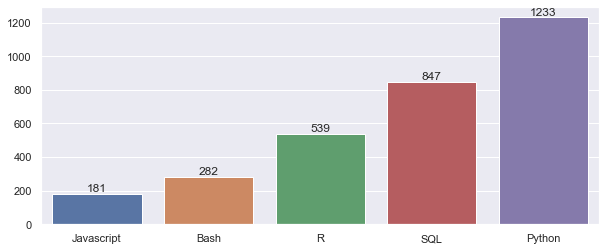

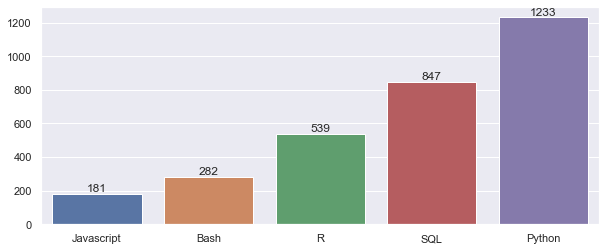

In [87]:
Question7 = []
for i in list(full_df):
    if 'Q7' in i:
        Question7.append(i)
Question7.pop()
Question7.pop()

Question14 = []
for i in list(full_df):
    if 'Q14' in i:
        Question14.append(i)
Question14.pop()
Question14.pop()


grouped = full_df.groupby(full_df['Year'])
yr2019 = (grouped.get_group(2019))
yr2020 = (grouped.get_group(2020))
yr2021 = (grouped.get_group(2021))

print(Question7)
def top5(a,b):          
    top_2_idx = sorted(range(len(a)), key=lambda i: a[i])[-5:]
    top_2_values = [a[i] for i in top_2_idx]
    top_2_names = [b[i] for i in top_2_idx]
    return(top_2_names,top_2_values)


def count(full_df,question_name,figure):
    sns.set(rc={"figure.figsize":(10, 4)})
    seniors = full_df[full_df['Q6'].isin(['5-10 years','20+ years','10-20 years'])]
    seniors = seniors[seniors['Q5'] == 'Data Scientist']
    #full_df.replace("missing",np.nan)
    new = []
    new2 = []
    for i in question_name:
        number = 0
        index = seniors[i][1:].value_counts(dropna=True).index.tolist()[0]
        if index == 'missing':
            number = 1
        new2.append(seniors[i][1:].value_counts(dropna=True).index.tolist()[number])
        new.append(seniors[i][1:].value_counts(dropna=True)[number])
    name,value = top5(new,new2)
    ax = sns.barplot(x = name, y = value,data=full_df)
    for container in ax.containers:
        ax.bar_label(container)
    ax = ax.get_figure()
    ax.savefig(figure)
    return(ax,name,value,new,new2)

#count(yr2019,Question7,"output1.png")
#count(yr2020,Question7,"output2.png")
count(yr2021,Question7,"output3.png")


In [ ]:
df = full_df.drop(0)
data = df["Q3"].value_counts()
print(data)
import matplotlib.pyplot as plt
df["Q3"].value_counts().reset_index()
df["Q2"].value_counts().reset_index()
India= df[(df['Q3'] == 'India')]
India["Q2"].value_counts().reset_index()
#India["Q2"].value_counts().plot.bar()
df["Q3"] = df["Q3"].replace(['United Kingdom of Great Britain and Northern Ireland'],["UK"])
United_States_of_America= df[(df['Q3'] == 'United States of America')]
United_States_of_America["Q2"].value_counts().reset_index()
df_developed = df[(df["Q3"]=="India") |(df["Q3"]=="Brazil")|(df["Q3"]=='Japan')|(df["Q3"]=='United States of America')][1:]
sns.countplot(x = df_developed['Q3'], hue = df_developed["Q2"])
df_developed["Q2"].value_counts().index
plt.xlabel('Countries')
plt.xticks(rotation=20)

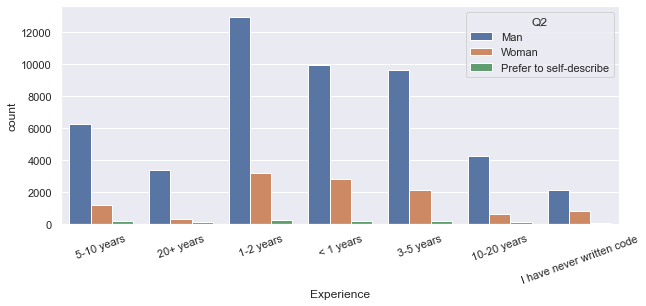

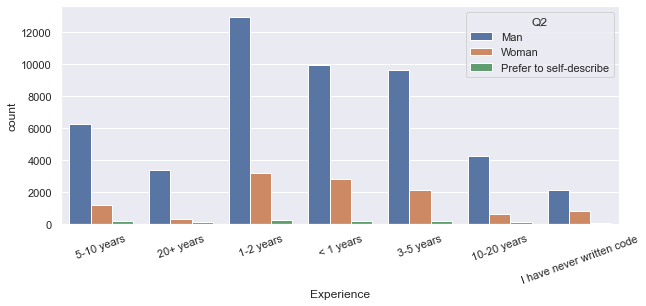

In [60]:

def bar_plot(qsx,qsy,label,rotate):   
    df = full_df.drop(0)
    df = df[df[qsx] != 'missing']
    sns.countplot(x = df[qsx], hue = df[qsy])
    plt.xlabel(label)
    plt.xticks(rotation=rotate)
bar_plot('Q6','Q2','Experience',20)

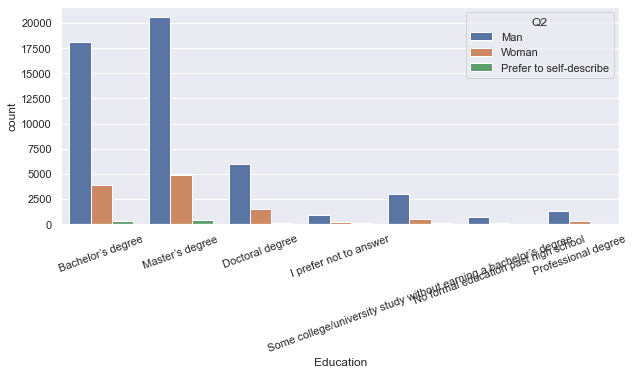

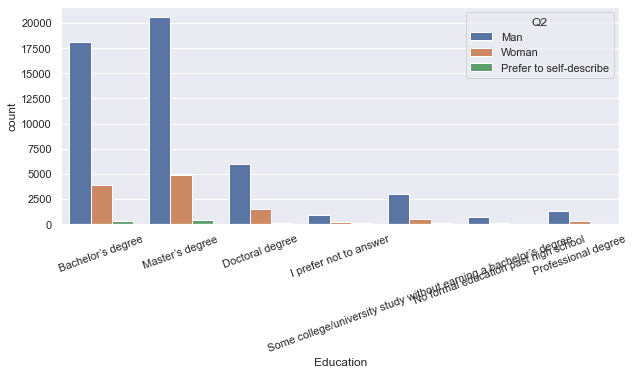

In [61]:
bar_plot('Q4','Q2','Education',20)

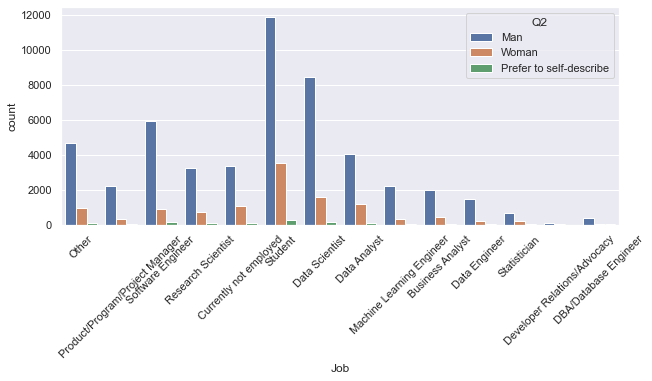

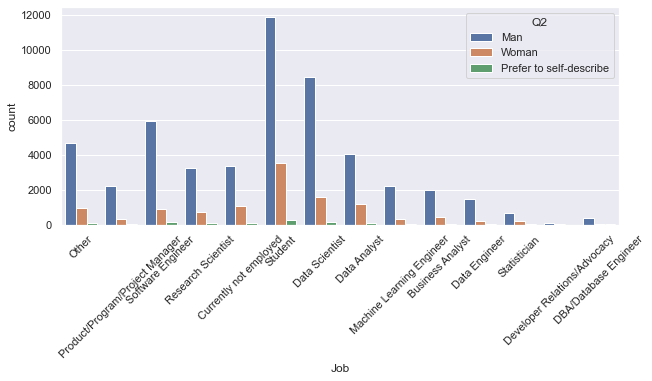

In [62]:
bar_plot('Q5','Q2','Job',45)

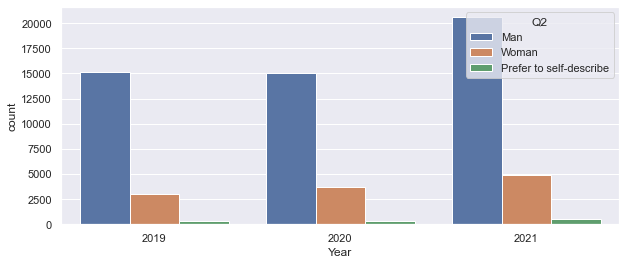

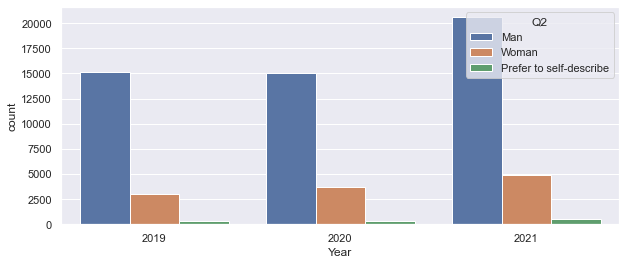

In [63]:
bar_plot('Year','Q2','Year',0)

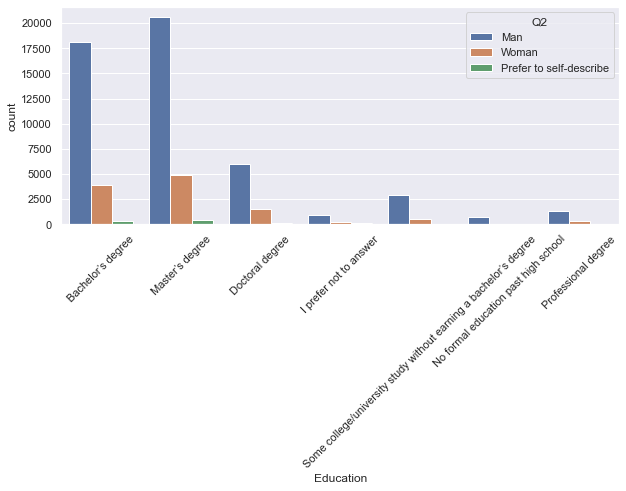

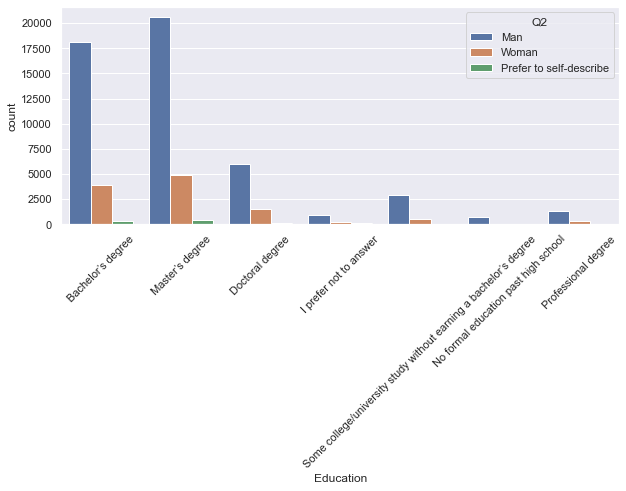

In [64]:
bar_plot('Q4','Q2','Education',45)

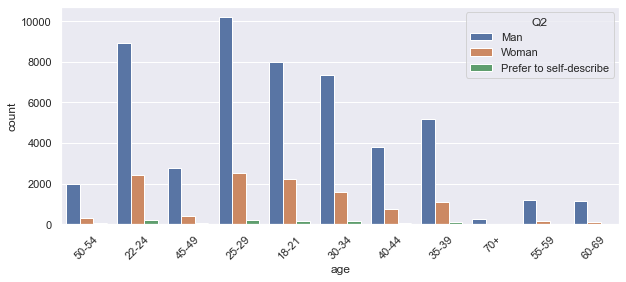

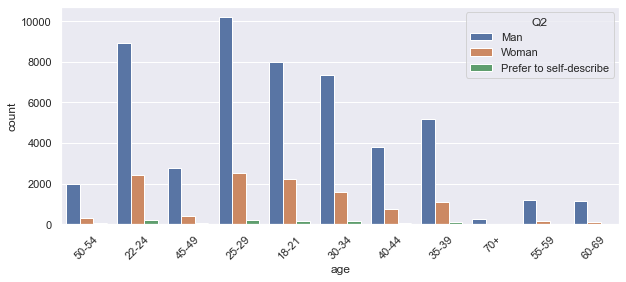

In [65]:
bar_plot('Q1','Q2','age',45)

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Pakistan'),
  Text(1, 0, 'India'),
  Text(2, 0, 'China'),
  Text(3, 0, 'United States of America'),
  Text(4, 0, 'UK')])

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Pakistan'),
  Text(1, 0, 'India'),
  Text(2, 0, 'China'),
  Text(3, 0, 'United States of America'),
  Text(4, 0, 'UK')])

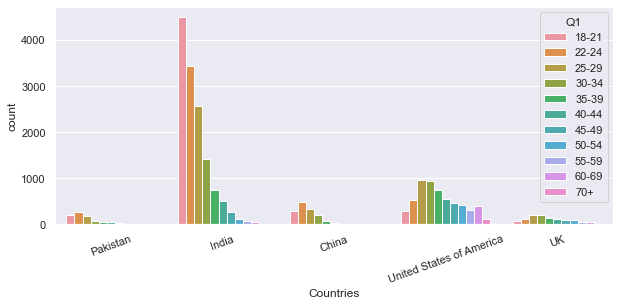

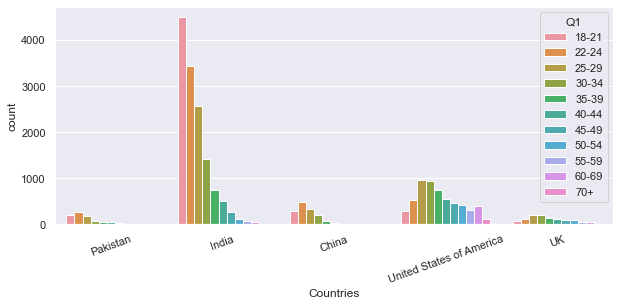

In [66]:
# sorting the age categories for the count plot
sorted_age_groups = sorted(df_developed.Q1.value_counts().index)


sns.countplot(data = df_developed[df_developed.Q2 == 'Man'], 
              x = 'Q3',
              hue= 'Q1',
              hue_order = sorted_age_groups)


'''sns.countplot(data = df_developed[df_developed.Q2 == 'Woman'], 
              x = 'Q3',
              hue= 'Q1',
              hue_order = sorted_age_groups)'''
plt.xlabel('Countries')
plt.xticks(rotation=20)


missing                                                         24930
0-999                                                            6984
10,000-14,999                                                    2444
1,000-1,999                                                      2141
100,000-124,999                                                  2044
30,000-39,999                                                    2003
40,000-49,999                                                    1956
50,000-59,999                                                    1907
5,000-7,499                                                      1719
15,000-19,999                                                    1549
60,000-69,999                                                    1529
20,000-24,999                                                    1513
70,000-79,999                                                    1382
7,500-9,999                                                      1330
2,000-2,999         

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'India'),
  Text(1, 0, 'Pakistan'),
  Text(2, 0, 'China'),
  Text(3, 0, 'United States of America'),
  Text(4, 0, 'UK')])

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'India'),
  Text(1, 0, 'Pakistan'),
  Text(2, 0, 'China'),
  Text(3, 0, 'United States of America'),
  Text(4, 0, 'UK')])

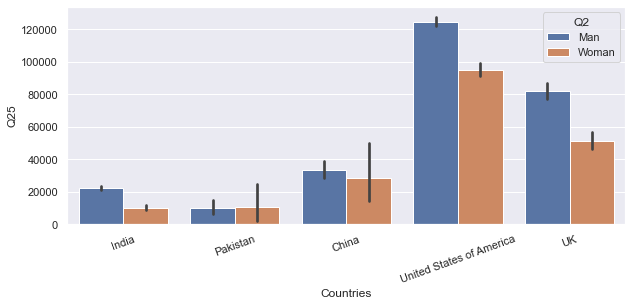

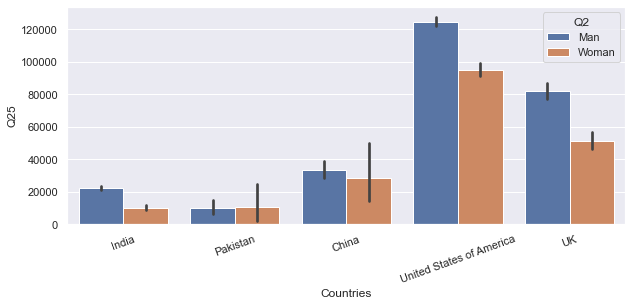

In [74]:
print(full_df.Q25.value_counts())
df = full_df.drop(0)
df = df[df['Q3'] != 'missing']
df["Q3"] = df["Q3"].replace(['United Kingdom of Great Britain and Northern Ireland'],["UK"])
df_developed = df[(df["Q3"]=="India") |(df["Q3"]=="China")|(df["Q3"]=='Pakistan')|(df["Q3"]=='United States of America')|(df["Q3"]=='UK')][1:]
def salaries(df_developed):
    df_developed['Q25'] = df_developed['Q25'].map({
        'I do not wish to disclose my approximate yearly compensation': np.NaN, #this introduces a lot of NaNs into the dataset
        '0-999': 500,
        '2,000-2,999' : 2500, 
        '1,000-1,999': 1500,
        '3,000-3,999': 3500,
        '4,000-4,999 ': 4500,
        '5,000-7,499 ': 6225,
        '7,500-9,999': 8725,
        '10,000-14,999': 12500,
        '15,000-19,999': 12500,
        '100,000-124,999': 112500,
        '20,000-24,999': 25000,
        '25,000-29,999': 25000,
        '125,000-149,999': 137500,
        '150,000-199,999': 175000,
        '30,000-39,999': 35000,
        '90,000-99,999': 95000,
        '70,000-79,999': 75000,
        '80,000-89,999': 85000,
        '60,000-69,999': 65000,
        '50,000-59,999': 55000,
        '40,000-49,999': 45000,
        '200,000-249,999': 225000,
        '250,000-299,999': 275000,
        '300,000-499,999': 400000,
        '> 500,000': 500000})
def salaries_reduced(df_developed):
    df_developed['Q25'] = df_developed['Q25'].map({
        'I do not wish to disclose my approximate yearly compensation': np.NaN, #this introduces a lot of NaNs into the dataset
        '0-999': '0-50,000',
        '2,000-2,999' : '0-50,000', 
        '1,000-1,999': '0-50,000',
        '3,000-3,999': '0-50,000',
        '4,000-4,999 ': '0-50,000',
        '5,000-7,499 ': '0-50,000',
        '7,500-9,999': '0-50,000',
        '10,000-14,999': '0-50,000',
        '15,000-19,999': '0-50,000',
        '100,000-124,999': '100,000-200,000',
        '20,000-24,999': '0-50,000',
        '25,000-29,999': '0-50,000',
        '125,000-149,999': '100,000-200,000',
        '150,000-199,999': '100,000-200,000',
        '30,000-39,999': '0-50,000',
        '90,000-99,999': '50,000-100,000',
        '70,000-79,999': '50,000-100,000',
        '80,000-89,999': '50,000-100,000',
        '60,000-69,999': '50,000-100,000',
        '50,000-59,999': '50,000-100,000',
        '40,000-49,999': '0-50,000',
        '200,000-249,999': '200,000-500,000',
        '250,000-299,999': '200,000-500,000',
        '300,000-499,999': '200,000-500,000',
        '> 500,000':'200,000-500,000'})
salaries(df_developed)
'''sns.violinplot(data = (df_developed.loc[((df_developed['Q2'] == 'Woman') | (df_developed['Q2'] == 'Man'))][1:]), # skip the NaNs
            x='Q3', 
            hue='Q2', 
            y='Q25', 
            kind='violin',
            split=True)'''
ax = sns.barplot(data = (df_developed.loc[((df_developed['Q2'] == 'Woman') | (df_developed['Q2'] == 'Man'))][1:]), # skip the NaNs
            x='Q3', 
            hue='Q2', 
            y='Q25')
plt.xlabel('Countries')
plt.xticks(rotation=20)

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'India'),
  Text(1, 0, 'United States of America'),
  Text(2, 0, 'Pakistan'),
  Text(3, 0, 'UK'),
  Text(4, 0, 'China')])

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'India'),
  Text(1, 0, 'United States of America'),
  Text(2, 0, 'Pakistan'),
  Text(3, 0, 'UK'),
  Text(4, 0, 'China')])

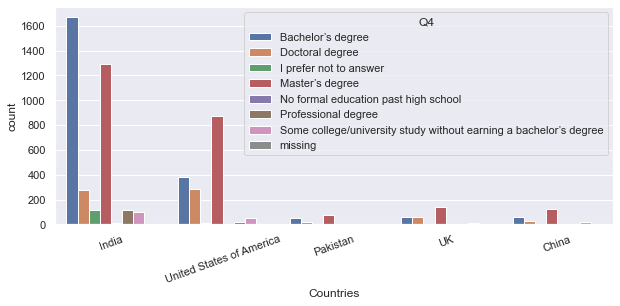

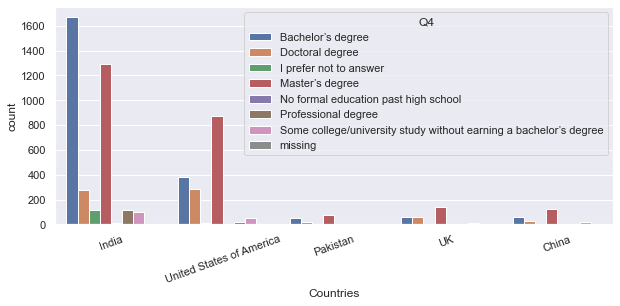

In [75]:
sorted_age_groups = sorted(df_developed["Q4"].value_counts().index)

df_developed = df_developed[df_developed['Q4'] != 'missing']
ax = sns.countplot(data = df_developed[df_developed.Q2 == 'Woman'], 
              x = 'Q3',
              hue= 'Q4',
              hue_order = sorted_age_groups)
#plt.yticks(ax.get_yticks(), ax.get_yticks())
plt.xlabel('Countries')
plt.xticks(rotation=20)

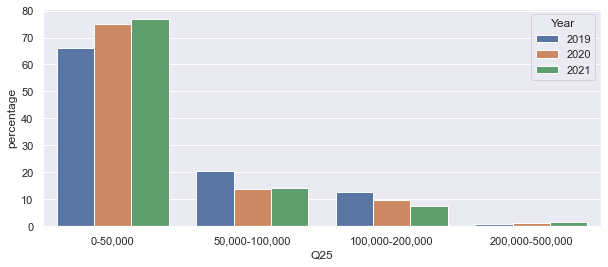

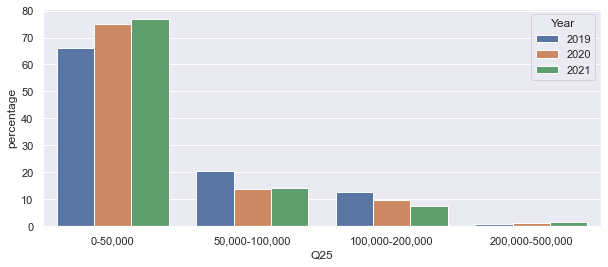

In [76]:
salaries_reduced(df)
data = df[df.Q2 == 'Woman']
data =data[data['Q25'] != 'missing']
occupation_counts = (data.groupby('Year')['Q25']
                     .value_counts(normalize=True)
                     .rename('percentage')
                     .mul(100)
                     .reset_index())
p = sns.barplot(x="Q25", y="percentage", hue='Year', data=occupation_counts)


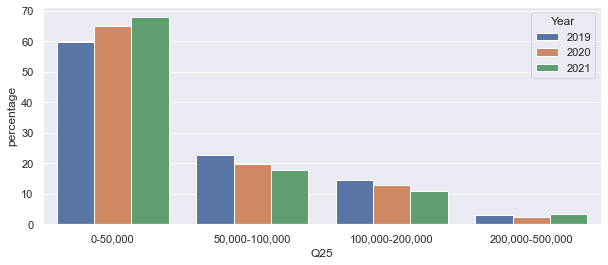

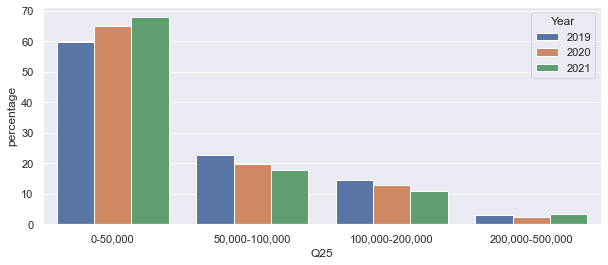

In [77]:
data = df[df.Q2 == 'Man']
data =data[data['Q25'] != 'missing']
occupation_counts = (data.groupby('Year')['Q25']
                     .value_counts(normalize=True)
                     .rename('percentage')
                     .mul(100)
                     .reset_index())
p = sns.barplot(x="Q25", y="percentage", hue='Year', data=occupation_counts)

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Master’s degree'),
  Text(1, 0, 'Bachelor’s degree'),
  Text(2, 0, 'Doctoral degree'),
  Text(3, 0, 'Some college/university study without earning a bachelor’s degree'),
  Text(4, 0, 'I prefer not to answer'),
  Text(5, 0, 'Professional degree'),
  Text(6, 0, 'No formal education past high school')])

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Master’s degree'),
  Text(1, 0, 'Bachelor’s degree'),
  Text(2, 0, 'Doctoral degree'),
  Text(3, 0, 'Some college/university study without earning a bachelor’s degree'),
  Text(4, 0, 'I prefer not to answer'),
  Text(5, 0, 'Professional degree'),
  Text(6, 0, 'No formal education past high school')])

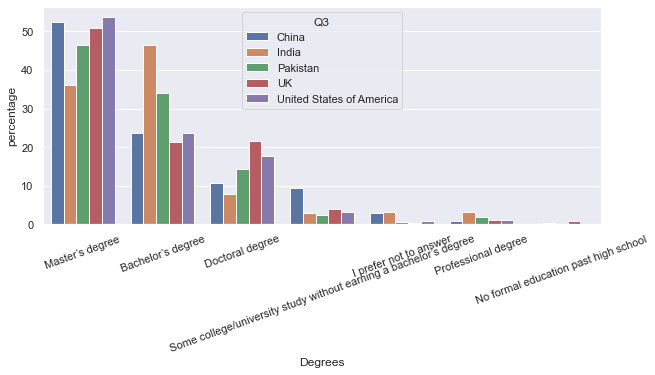

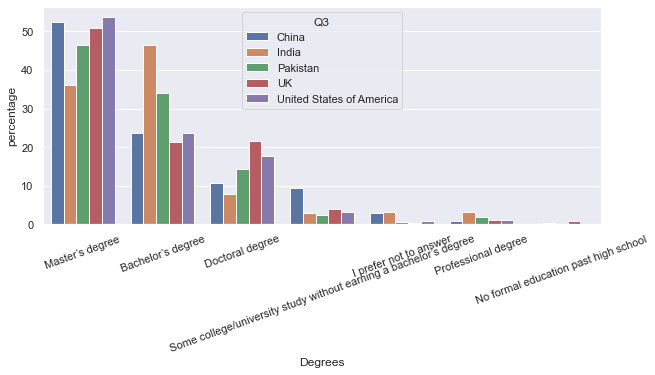

In [78]:
data = df_developed[df_developed.Q2 == 'Woman']
occupation_counts = (data.groupby(['Q3'])['Q4']
                     .value_counts(normalize=True)
                     .rename('percentage')
                     .mul(100)
                     .reset_index())
p = sns.barplot(x="Q4", y="percentage", hue="Q3", data=occupation_counts)
plt.xlabel('Degrees')
plt.xticks(rotation=20)

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'India'),
  Text(1, 0, 'United States of America'),
  Text(2, 0, 'Pakistan'),
  Text(3, 0, 'UK'),
  Text(4, 0, 'China')])

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'India'),
  Text(1, 0, 'United States of America'),
  Text(2, 0, 'Pakistan'),
  Text(3, 0, 'UK'),
  Text(4, 0, 'China')])

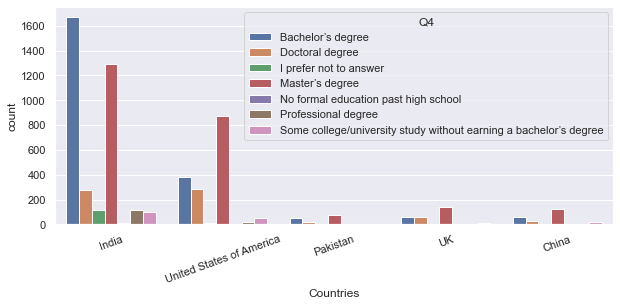

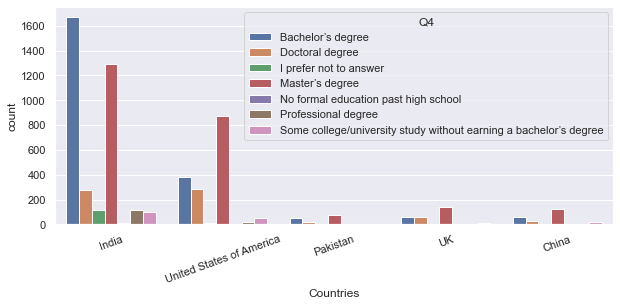

In [79]:
sorted_age_groups = sorted(df_developed["Q4"].value_counts().index)

df_developed = df_developed[df_developed['Q4'] != 'missing']
sns.countplot(data = df_developed[df_developed.Q2 == 'Woman'], 
              x = 'Q3',
              hue= 'Q4',
              hue_order = sorted_age_groups)
plt.xlabel('Countries')
plt.xticks(rotation=20)


(array([0, 1, 2, 3]),
 [Text(0, 0, 'Romania'),
  Text(1, 0, 'Belarus'),
  Text(2, 0, 'Saudi Arabia'),
  Text(3, 0, 'Belgium')])

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Romania'),
  Text(1, 0, 'Belarus'),
  Text(2, 0, 'Saudi Arabia'),
  Text(3, 0, 'Belgium')])

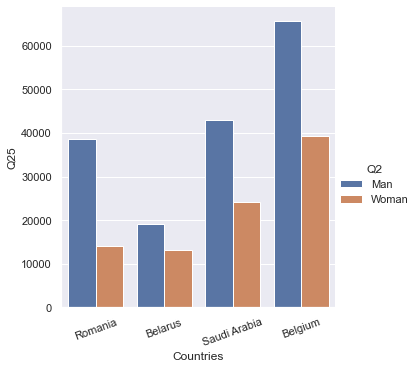

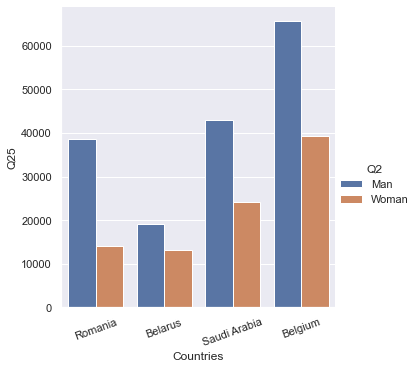

In [83]:
df = full_df.drop(0)
import matplotlib.pyplot as plt

df = df[df['Q3'] != 'missing']

df_developed2 = df[(df["Q3"]=="Saudi Arabia")|(df["Q3"]=='Belgium')|(df["Q3"]=='Belarus')|(df["Q3"]=='Romania')][1:]
salaries(df_developed2)
sns.catplot(data = (df_developed2.loc[((df_developed2['Q2'] == 'Woman') | (df_developed2['Q2'] == 'Man'))][1:]), # skip the NaNs
            x='Q3', 
            hue='Q2', 
            y='Q25', 
            kind='bar', ci=None)
plt.xlabel('Countries')
plt.xticks(rotation=20)


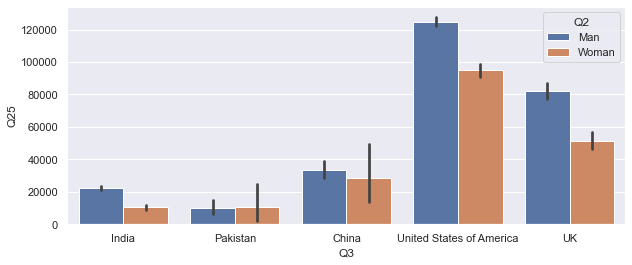

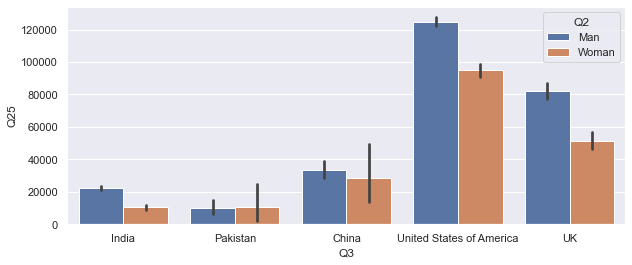

In [48]:
ax = sns.barplot(data = (df_developed.loc[((df_developed['Q2'] == 'Woman') | (df_developed['Q2'] == 'Man'))][1:]), # skip the NaNs
            x='Q3', 
            hue='Q2', 
            y='Q25')